# Linear Interpolation with Images

One of the applications mentioned in the introductory note on generative models, is the ability to interpolate between samples in a realistic manner. In other words, each step of the interpolation produces a realistic-looking image. This not only produces some cool animations, but is also useful for designers and educators.

<img src="images/1b_1_bilinear_GAN.png" style="width:50%">

The images above look pretty good, and were generated by a GAN. That's cool, but in order to really appreciate it, let's compare that to a simple baseline: how would a simple linear interpolation do? The idea behind linear interpolation is to go from one image to another image in linear steps: each pixel changes by a constant step in the sequence of intermediate images. 

If one desires mathematical precision, let $x^{(0)}$ be the first image and $x^{(n)}$ be the second image, with $n-1$ intermediate images, each represented by $x^{(i)}$ for $i \in \{1, \ldots, n-1\}$. Then each pixel $j$ of the $i^\text{th}$ image:

$$ x^{(i)}_j = x^{(0)}_j + \frac{i}{n}(x^{(n)}_j - x^{(0)}_j)$$

Let's see how this does with a few different image datasets!

### MNIST

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scripts import celeba_utils
import os
import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


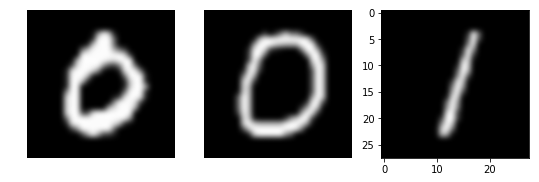

In [52]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Load the MNIST dataset.
x_0 = x_test[np.where(y_test==0)[0][0]] 
x_0b = x_test[np.where(y_test==0)[0][1]] 
x_1 = x_test[np.where(y_test==1)[0][0]]

# Show some examples.
_, ax = plt.subplots(1, 3, figsize=[9, 3])
ax[0].imshow(x_0, cmap='gray', interpolation='bicubic'); ax[0].set_axis_off()
ax[1].imshow(x_0b, cmap='gray', interpolation='bicubic'); ax[0].set_axis_off()
ax[2].imshow(x_1, cmap='gray', interpolation='bicubic'); ax[1].set_axis_off()

In [24]:
def interpolate(initial_img, final_img, n):
    images = list()
    for i in range(0, n+1):
        images.append(initial_img.astype(float) + (final_img.astype(float) - initial_img.astype(float))*i/n)
    return images

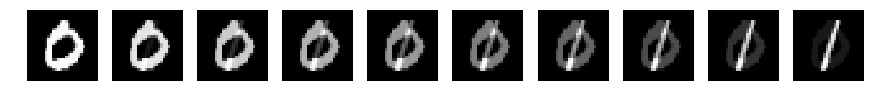

In [8]:
interpolated_images = interpolate(x_0, x_1, 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i], cmap='gray')
    ax[i].set_axis_off()

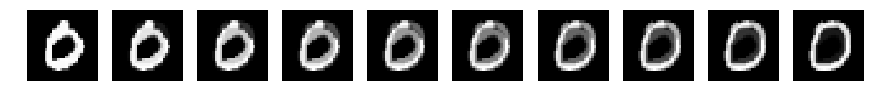

In [49]:
interpolated_images = interpolate(x_0, x_0b, 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i], cmap='gray')
    ax[i].set_axis_off()

The intermediate stages do not look real images. But perhaps that is to be expected -- it seems hard to generate intermediate digit shapes that look like real digits. What about images of faces?

## CelebA

The CelebA dataset consists of headshots of celebrities and is popularly used to train generative models. As shown above, a GAN trained on such images can produce realistic-looking interpolations between celebrities. What about linear interpolation?

In [26]:
data_dir = 'datasets/celeba_data'
celeba_utils.download_extract('celeba', data_dir)
paths = glob.glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))
celeb_images = celeba_utils.get_batch(paths[:10], 256, 256, 'RGB')

Found celeba Data


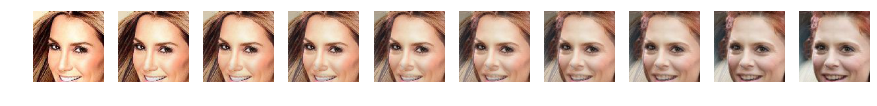

In [27]:
interpolated_images = interpolate(celeb_images[0], celeb_images[1], 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i]/255)
    ax[i].set_axis_off()

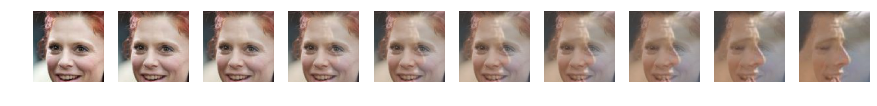

In [28]:
interpolated_images = interpolate(celeb_images[1], celeb_images[2], 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i]/255)
    ax[i].set_axis_off()

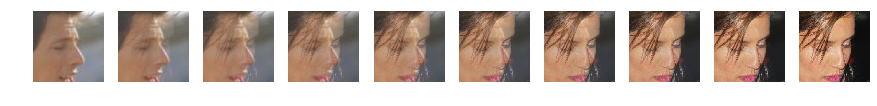

In [29]:
interpolated_images = interpolate(celeb_images[2], celeb_images[3], 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i]/255)
    ax[i].set_axis_off()

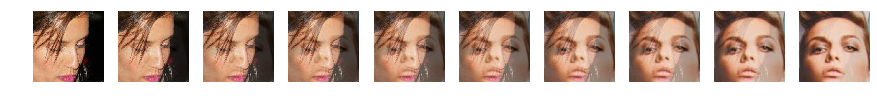

In [30]:
interpolated_images = interpolate(celeb_images[3], celeb_images[4], 10)
_, ax = plt.subplots(1, 10, figsize=[15, 1.5])
for i in range(10):
    ax[i].imshow(interpolated_images[i]/255)
    ax[i].set_axis_off()

Interestingly, the first interpolation looked kind of realistic. However, when the interpolation occurs between images that are very different, then the images don't look very realistic at all.

## Interpolation with Carefully-Chosen Images

So this raises an interesting question: what if we to do linear interpolation between very similar images? In particular, 

In [3]:
data_dir = 'datasets/celeba_data'
celeba_utils.download_extract('celeba', data_dir)
paths = glob.glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))
celeb_images = celeba_utils.get_batch(paths[:1000], 128, 128, 'RGB')

Found celeba Data


In [28]:
start = 0
visited_set = [start]
n_visit = 30

for i in range(n_visit):
    distances = np.linalg.norm((celeb_images - celeb_images[0]).reshape(1000, -1),axis=1)
    for j in distances.argsort():
        if not (j in visited_set):
            break
    visited_set.append(j)

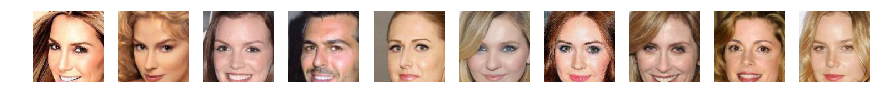

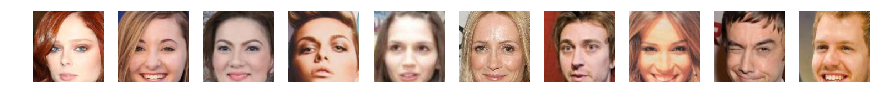

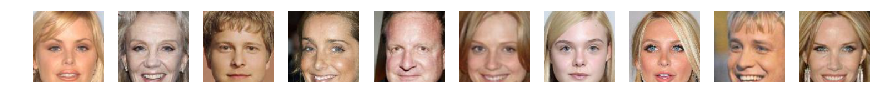

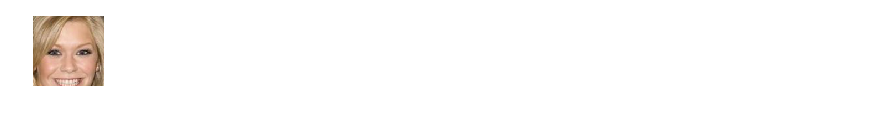

In [33]:
for rows in range(len(visited_set)//10 + 1):
    _, ax = plt.subplots(1, 10, figsize=[15, 1.5])
    for i in range(10):
        if (rows*10 + i) < len(visited_set):
            ax[i].imshow(celeb_images[visited_set[rows*10 + i]]/255)
        ax[i].set_axis_off()

In [ ]:
count = 0

for i in range(len(visited_set)-1):
    interpolated_images = interpolate(celeb_images[visited_set[i]], celeb_images[visited_set[i+1]], 10)
    for i in range(10):
        count += 1
        plt.figure()
        plt.imshow(interpolated_images[i]/255, interpolation='bicubic')
        plt.axis('off')
        plt.savefig('outputs/celeb_int_'+str(count)+'.png')

The result looks something like this:

<img src="images/1b_2_linear_interpolation_animation_med.gif" style="width:50%">

It's not that great, but perhaps not as bad as one might naively expect. Nevertheless, over the next few notebooks, we'll develop methods that can do significantly better interpolation by interpolating in a meaningful latent space, rather than the image space directly.